# Project 4: Solutions

In this project, you will combine and apply your knowledge from all three past unit projects to create a complete data science workflow on a new dataset. We will use the Kaggle Titanic competition dataset for this project.

In [1]:
import numpy as np
import pandas as pd
import json
from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics
from sklearn import cross_validation
from sklearn import grid_search
from sklearn import metrics
import sklearn as sk

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

![](../assets/images/workflow/data-science-workflow-01.png)

## Part 1. Identify the Problem

Using the competition description on [Kaggle](https://www.kaggle.com/c/titanic), write a short paragraph summarizing the problem, your goals and hypothesis.

**NOTE**: This section can be less rigorous for a kaggle competition where the problem, goals, and hypothesis are identified for you.

**Problem**: The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

**Goals**: Explore the dataset and determine the relationships present in the data to build a model to predict survivorship in the dataset.

**Hypothesis**: Some groups of people were more likely to survive than others. A model that learns this can predict which passengers survived the tragedy.

![](../assets/images/workflow/data-science-workflow-02.png)

## Part 2. Acquire the Data

Kaggle has provided two files for this dataset:  
_train.csv_: Use for building a model (contains target variable "Survived")  
_test.csv_: Use for submission file (fill in for target variable "Survived")

Both files have been downloaded and added to your datasets folder. Read the files into a Pandas DataFrame.

**HINT**: You can further split _train.csv_ to generate your own cross validation set. However, use all of _train.csv_ to train your final model since Kaggle has already separated the test set for you.

In [2]:
# load training set data
TS = pd.read_csv(r'C:\Users\roundce\Documents\DS-DC-13\FinalProject\Training_Set.csv')

#head
TS.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


![](../assets/images/workflow/data-science-workflow-03-05.png)

## Part 3. Parse, Mine, and Refine the data

Perform exploratory data analysis and verify the quality of the data.

### Check columns and counts to drop any non-generic or near-empty columns

In [3]:
# Check columns
print TS.columns.values

['id' 'amount_tsh' 'date_recorded' 'funder' 'gps_height' 'installer'
 'longitude' 'latitude' 'wpt_name' 'num_private' 'basin' 'subvillage'
 'region' 'region_code' 'district_code' 'lga' 'ward' 'population'
 'public_meeting' 'recorded_by' 'scheme_management' 'scheme_name' 'permit'
 'construction_year' 'extraction_type' 'extraction_type_group'
 'extraction_type_class' 'management' 'management_group' 'payment'
 'payment_type' 'water_quality' 'quality_group' 'quantity' 'quantity_group'
 'source' 'source_type' 'source_class' 'waterpoint_type'
 'waterpoint_type_group' 'status_group']


In [4]:
# Check counts
print TS.count()

id                       59400
amount_tsh               59400
date_recorded            59400
funder                   55765
gps_height               59400
installer                55745
longitude                59400
latitude                 59400
wpt_name                 59400
num_private              59400
basin                    59400
subvillage               59029
region                   59400
region_code              59400
district_code            59400
lga                      59400
ward                     59400
population               59400
public_meeting           56066
recorded_by              59400
scheme_management        55523
scheme_name              31234
permit                   56344
construction_year        59400
extraction_type          59400
extraction_type_group    59400
extraction_type_class    59400
management               59400
management_group         59400
payment                  59400
payment_type             59400
water_quality            59400
quality_

Dataframe has multiple data sites with different types of data. The outcome variable is in the status_group column is a binary outcome. There are 40 independent variables.
Please see the data dictionary below:
amount_tsh - Total static head (amount water available to waterpoint) date_recorded - The date the row was entered funder - Who funded the well gps_height - Altitude of the well installer - Organization that installed the well longitude - GPS coordinate latitude - GPS coordinate wpt_name - Name of the waterpoint if there is one num_private - Could not recover any information on this variable and will remove it from analysis basin - Geographic water basin subvillage - Geographic location region - Geographic location region_code - Geographic location (coded) district_code - Geographic location (coded) lga - Geographic location ward - Geographic location population - Population around the well public_meeting - True/False recorded_by - Group entering this row of data scheme_management - Who operates the waterpoint scheme_name - Who operates the waterpoint permit - If the waterpoint is permitted construction_year - Year the waterpoint was constructed extraction_type - The kind of extraction the waterpoint uses extraction_type_group - The kind of extraction the waterpoint uses extraction_type_class - The kind of extraction the waterpoint uses management - How the waterpoint is managed management_group - How the waterpoint is managed payment - What the water costs payment_type - What the water costs water_quality - The quality of the water quality_group - The quality of the water quantity - The quantity of water quantity_group - The quantity of water source - The source of the water source_type - The source of the water source_class - The source of the water waterpoint_type - The kind of waterpoint waterpoint_type_group - The kind of waterpoint

Removed the following variables becaues they were deemed unlikely to directly impact the likelihood of pump failure. 

ID of the individual pump
date_recorded - The date the row was entered
funder - Who funded the well
wpt_name - Name of the waterpoint if there is one
num_private - Could not recover any information on this variable and will remove it from analysis
public_meeting - True/False
recorded_by - Group entering this row of data

### Check for missing values and drop or impute

In [5]:
# Check counts for missing values in each column
print TS.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [6]:
# load new training set data
TS2 = pd.read_csv(r'C:\Users\roundce\Documents\DS-DC-13\FinalProject\Training_Set2.csv')

TS2.isnull().sum()

id                           0
amount_tsh                   0
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoi

In [111]:
#Dropped scheme name since nearly half of the training set lacked these values
TS3 = pd.read_csv(r'C:\Users\roundce\Documents\DS-DC-13\FinalProject\Training_Set3.csv')

#Dropped rows that didn't have values for scheme_management
TS4 = TS3.dropna()

#Check for missing values
TS4.isnull().sum()

id                       0
amount_tsh               0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
dtype: int64

We know that longitude, latitude, region_code, district_code, and construction year are not useful for this type of analysis. That said, amount_tsh, gps_height, and population are revealing. We know that there are areas where there are pumps where there is either no population or where population has not been recorded. 

In [112]:
#Count of remaining rows
TS4.count()

id                       50956
amount_tsh               50956
gps_height               50956
installer                50956
longitude                50956
latitude                 50956
basin                    50956
subvillage               50956
region                   50956
region_code              50956
district_code            50956
lga                      50956
ward                     50956
population               50956
scheme_management        50956
permit                   50956
construction_year        50956
extraction_type          50956
extraction_type_group    50956
extraction_type_class    50956
management               50956
management_group         50956
payment                  50956
payment_type             50956
water_quality            50956
quality_group            50956
quantity                 50956
quantity_group           50956
source                   50956
source_type              50956
source_class             50956
waterpoint_type          50956
waterpoi

### Perform exploratory data analysis

In [113]:
# Get summary statistics for data
TS4.describe()



,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,50956.000000,50956.000000,50956.000000,50956.000000,5.095600e+04,50956.000000,50956.000000,50956.000000,50956.000000
mean,37167.952017,346.371608,697.324849,34.029307,-5.664613e+00,14.957512,5.698132,177.549710,1344.262854
std,21447.926555,2773.720348,696.638465,6.794319,2.936314e+00,17.174732,9.625136,467.592011,936.687918
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000,0.000000,0.000000
25%,18591.750000,0.000000,0.000000,33.035964,-8.246765e+00,5.000000,2.000000,0.000000,0.000000
50%,37127.500000,0.000000,459.000000,35.050748,-4.949378e+00,12.000000,3.000000,35.000000,1988.000000
75%,55706.250000,33.000000,1331.000000,37.340380,-3.318178e+00,17.000000,5.000000,210.000000,2005.000000
max,74247.000000,250000.000000,2770.000000,40.323402,-2.000000e-08,99.000000,80.000000,30500.000000,2013.000000


In [114]:
#Datatypes for remaining variables
TS4.dtypes

id                         int64
amount_tsh               float64
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
scheme_management         object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_group             object
quantity                  object
quantity_group            object
source                    object
source_type               object
source_cla

In [115]:
#Checking the status of the sheet
TS4.head()

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,subvillage,region,region_code,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,21,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
5,9944,20.0,0,DWE,39.172796,-4.765587,Pangani,Moa/Mwereme,Tanga,4,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional


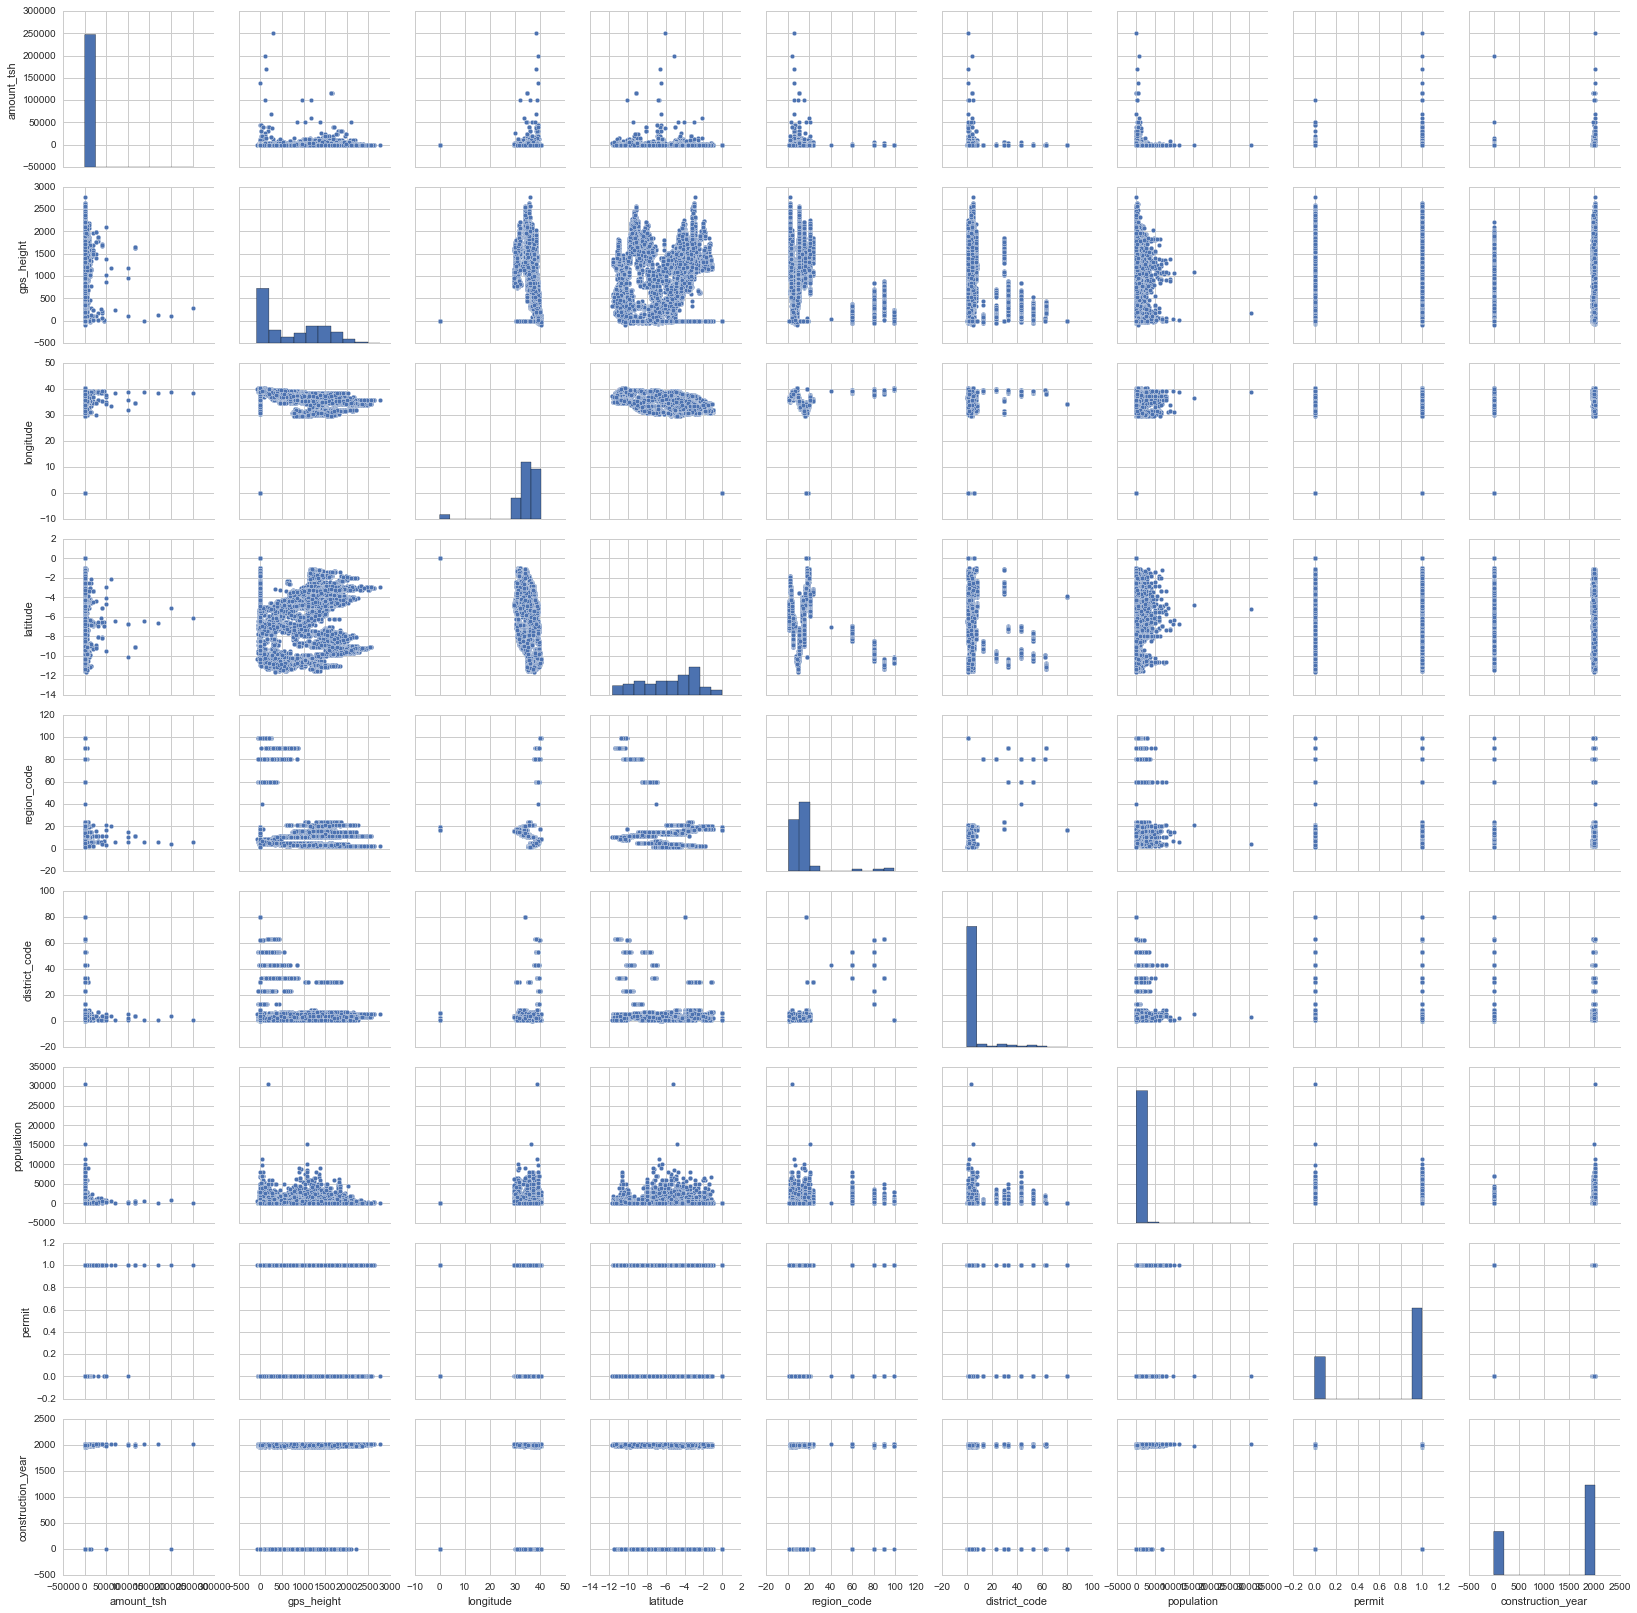

In [16]:
# Get pair plot for data
sns.pairplot(TS4)

Since so much of the data is categorical and dummy variables would quickly become unwieldy, we're going to shy away from regression type techniques. We're going to look into using random forest next. 

### Check and convert all data types to numerical

In [116]:
# Check data types
print TS4.dtypes

id                         int64
amount_tsh               float64
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
scheme_management         object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_group             object
quantity                  object
quantity_group            object
source                    object
source_type               object
source_cla

### Write a function to pre-process data for building a model using label encoder START HERE

In [117]:
#Make our pipeline
from sklearn import preprocessing
from sklearn import pipeline
le = preprocessing.LabelEncoder()


In [118]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = le.fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [119]:
TS5 = MultiColumnLabelEncoder(columns = ['installer','basin','subvillage','region','district_code','lga','ward','scheme_management','permit','extraction_type','extraction_type_group','extraction_type_class','management',
                                   'management_group','payment','payment_type','water_quality','quality_group','quantity','quantity_group','source','source_type','source_class','waterpoint_type',
                                   'waterpoint_type_group','status_group']).fit_transform(TS4)



In [120]:


# Check data types
print TS5.dtypes

id                         int64
amount_tsh               float64
gps_height                 int64
installer                  int64
longitude                float64
latitude                 float64
basin                      int64
subvillage                 int64
region                     int64
region_code                int64
district_code              int64
lga                        int64
ward                       int64
population                 int64
scheme_management          int64
permit                     int64
construction_year          int64
extraction_type            int64
extraction_type_group      int64
extraction_type_class      int64
management                 int64
management_group           int64
payment                    int64
payment_type               int64
water_quality              int64
quality_group              int64
quantity                   int64
quantity_group             int64
source                     int64
source_type                int64
source_cla

In [122]:
#Set up test data

test = pd.read_csv(r'C:\Users\roundce\Documents\DS-DC-13\FinalProject\test_set_values2.csv')


In [123]:
#encode

test1 = MultiColumnLabelEncoder(columns = ['id','installer','basin','subvillage','region','district_code','lga','ward','scheme_management','permit','extraction_type','extraction_type_group','extraction_type_class','management',
                                   'management_group','payment','payment_type','water_quality','quality_group','quantity','quantity_group','source','source_type','source_class','waterpoint_type',
                                   'waterpoint_type_group']).fit_transform(test)


C:\Users\roundce\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


![](../assets/images/workflow/data-science-workflow-06.png)

## Part 4. Build a Model

Create a cross validation split, select and build a model, evaluate the model, and refine the model

### Create cross validation sets

In [124]:
print TS5.columns

Index([u'id', u'amount_tsh', u'gps_height', u'installer', u'longitude',
       u'latitude', u'basin', u'subvillage', u'region', u'region_code',
       u'district_code', u'lga', u'ward', u'population', u'scheme_management',
       u'permit', u'construction_year', u'extraction_type',
       u'extraction_type_group', u'extraction_type_class', u'management',
       u'management_group', u'payment', u'payment_type', u'water_quality',
       u'quality_group', u'quantity', u'quantity_group', u'source',
       u'source_type', u'source_class', u'waterpoint_type',
       u'waterpoint_type_group', u'status_group'],
      dtype='object')


In [126]:
#Set features for use
feature = TS5[[u'id', u"amount_tsh", u'gps_height', u'installer', u'longitude', u'latitude',
       u'basin', u'subvillage', u'region', u'region_code', u'district_code',
       u'lga', u'ward', u'population', u'scheme_management', u'permit',
       u'construction_year', u'extraction_type', u'extraction_type_group',
       u'extraction_type_class', u'management', u'management_group',
       u'payment', u'payment_type', u'water_quality', u'quality_group',
       u'quantity', u'quantity_group', u'source', u'source_type',
       u'source_class', u'waterpoint_type', u'waterpoint_type_group',]]


#set target
target = TS5[['status_group']]


#set x and y

x = feature
y = np.ravel(target)

In [127]:
# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.4, random_state=42)

In [128]:
TS5.head()

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,subvillage,region,region_code,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,1390,1344,34.938093,-9.856322,1,10335,3,11,...,6,2,1,1,8,6,0,1,1,0
1,8776,0.0,1399,489,34.698766,-2.147466,4,13888,9,20,...,6,2,2,2,5,3,1,1,1,0
2,34310,25.0,686,1824,37.460664,-3.821329,5,7952,8,21,...,6,2,1,1,0,1,1,2,1,0
3,67743,0.0,263,1641,38.486161,-11.155298,7,7875,12,90,...,6,2,0,0,3,0,0,2,1,2
5,9944,20.0,0,346,39.172796,-4.765587,5,10339,20,4,...,4,4,1,1,4,2,2,2,1,0


In [140]:
print test1.columns

Index([u'id', u'amount_tsh', u'gps_height', u'installer', u'longitude',
       u'latitude', u'basin', u'subvillage', u'region', u'region_code',
       u'district_code', u'lga', u'ward', u'population', u'scheme_management',
       u'scheme_name', u'permit', u'construction_year', u'extraction_type',
       u'extraction_type_group', u'extraction_type_class', u'management',
       u'management_group', u'payment', u'payment_type', u'water_quality',
       u'quality_group', u'quantity', u'quantity_group', u'source',
       u'source_type', u'source_class', u'waterpoint_type',
       u'waterpoint_type_group'],
      dtype='object')


### Build a model

In [129]:
# Train model on training set
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [130]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(X_train, y_train)

# Evaluate model on test set
print "Accuracy: %0.3f" % rf.score(X_test, y_test)

Accuracy: 1.000
Accuracy: 0.806


In [131]:
from sklearn import ensemble

# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=20)


In [132]:
# Set list of values to grid search over
n = [1, 2, 3, 10, 20, 30, 100, 200, 300]
params = {'n_estimators': n}

# Perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(),
    param_grid=params)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 10, 20, 30, 100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [136]:
# Get best value to use
print "Best Params:"
print gs.best_params_

# Get improvement
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test)
print "Accuracy using best param: %0.3f" % gs.best_score_

# Plot scores
plt.plot(n, [s[1] for s in gs.grid_scores_])



Best Params:
{'n_estimators': 200}


NotFittedError: Estimator not fitted, call `fit` before exploiting the model.

In [137]:
# Plot importances for all features
features = x.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

NotFittedError: Estimator not fitted, call `fit` before `feature_importances_`.

In [110]:
output = rf.predict(test1)

ValueError: Number of features of the model must  match the input. Model n_features is 32 and  input n_features is 33 

In [90]:
print output

[0 0 0 ..., 0 0 0]


In [84]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(x, y)

Accuracy: 1.000


### Evaluate the model

In [17]:
# Check model accuracy on test set
print "Accuracy: %0.3f" % lm.score(X_test, y_test)

Accuracy: 0.787


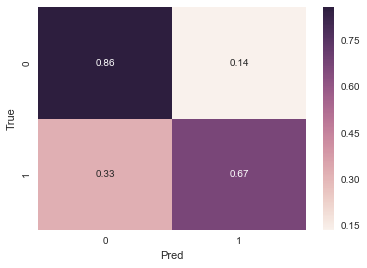

Confusion Matrix:
[[186  30]
 [ 46  95]]


In [18]:
# Get confusion matrix on test set
y_pred = lm.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

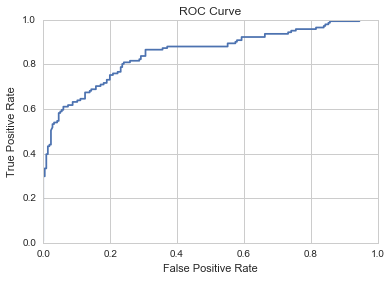

ROC AUC: 0.851


In [19]:
# Plot ROC curve and get AUC score
y_pred_proba = lm.predict_proba(X_test)[:,1]

# Determine the false positive and true positive rates
fpr, tpr, t = metrics.roc_curve(y_test, y_pred_proba)

 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Get ROC AUC score
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test, y_pred_proba)

### Tune the model

In [20]:
# Set list of values to grid search over
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
s = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
params = {'C': c, 'solver':s}

# Perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=linear_model.LogisticRegression(),
    param_grid=params)
gs.fit(X_train, y_train)

# Get best value to use
print "Best Params:"
print gs.best_params_

# Get improvement
print "Accuracy of current model: %0.3f" % lm.score(X_test, y_test)
print "Accuracy using best param: %0.3f" % gs.best_score_

/Users/jim/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Best Params:
{'C': 1, 'solver': 'newton-cg'}
Accuracy of current model: 0.787
Accuracy using best param: 0.815


### Update parameters

In [21]:
# Current model params
print lm
print "Accuracy of current model: %0.3f" % lm.score(X_test, y_test)

# Update model params
lm.set_params(C=0.1)
lm.set_params(solver='newton-cg')

# Retrain model on new params
lm.fit(X_train, y_train)

# Updated model params
print lm
print "Accuracy of updated model: %0.3f" % lm.score(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy of current model: 0.787
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy of updated model: 0.796


![](../assets/images/workflow/data-science-workflow-07.png)

## Part 5: Present the Results

Generate summary of findings and kaggle submission file.

NOTE: For the purposes of generating summary narratives and kaggle submission, we can train the model on the entire training data provided in _train.csv_.

### Load Kaggle training data and use entire data to train tuned model

In [22]:
# Load data
df_train = pd.read_csv("../assets/datasets/titanic/train.csv")

# Wrangle data
df_train = wrangler(df_train)

# Pre-process data
df_train = pre_proc(df_train)

In [23]:
# Set target variable name
target = 'Survived'

# Set X_train and y_train
X_train = df_train.drop([target], axis=1)
y_train = df_train[target]

In [24]:
# Build tuned model
lm = linear_model.LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

# Train tuned model
lm.fit(X_train, y_train)

# Score tuned model
print "Accuracy: %0.3f" % lm.score(X_train, y_train)

Accuracy: 0.806


### Use trained model to generate a few summary findings

In [25]:
# Generate probabililty of survivial using trained model
df_train['Probability'] = lm.predict_proba(X_train)[:,1]

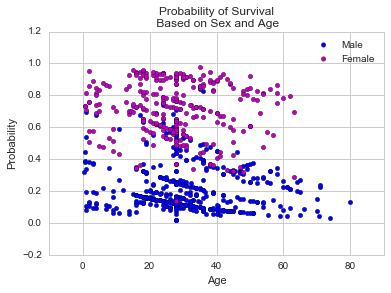

In [26]:
# Plot Probability of Survivial Based on Sex and Age
ax = df_train[df_train['Sex_male']==1].plot(x='Age', y='Probability', kind='scatter', color='b', label='Male')
df_train[df_train['Sex_female']==1].plot(ax=ax, x='Age', y='Probability', kind='scatter', color='m', label='Female')
ax.set(title='Probability of Survival\n Based on Sex and Age')

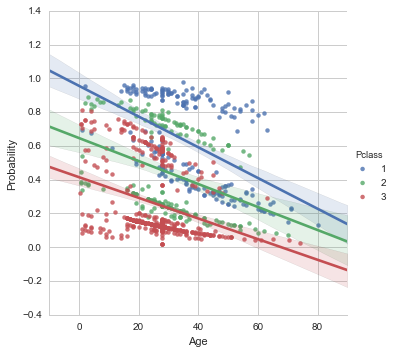

In [27]:
# Plot Probability of Survivial Based on Pclass and Age
sns.lmplot(x="Age", y="Probability", hue="Pclass", data=df_train)

**Summary of findings**: We are able to predict survivorship using the features 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', and, 'Embarked' at an 80% accuracy. Higher class females had the highest probability of survival according to the model.

### Load Kaggle test data, make predictions using model, and generate submission file

In [28]:
# Load data
df_test = pd.read_csv("../assets/datasets/titanic/test.csv")

# Create DF for submission
df_sub = df_test[['PassengerId']]

# Wrangle data
df_test = wrangler(df_test)

# Pre-process data
df_test = pre_proc(df_test)

# Check data
df_sub.head()

# Predict using tuned model
df_sub['Survived'] = lm.predict(df_test)

# Write submission file
df_sub.to_csv("../assets/datasets/titanic/mysubmission.csv", index=False)

print "Check ../assets/datasets/titanic/ for submission file"

Check ../assets/datasets/titanic/ for submission file


**Kaggle score** _(if submitted to Kaggle)_: 0.76555

**HINT**: Try tranforming or combining features and create additional features to improve your score. This is a popular introductory dataset, Google for additional feature engineering hints!